In [32]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
mnist = tf.keras.datasets.mnist
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [15]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.fit(X_train,Y_train,epochs=5)
model.save("Handwritten.keras") 

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8700 - loss: 0.4692
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9652 - loss: 0.1123
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9776 - loss: 0.0733
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9841 - loss: 0.0500
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9884 - loss: 0.0371


In [57]:
model = tf.keras.models.load_model("handwritten.keras")

In [58]:
loss, accuracy = model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9719 - loss: 0.0971


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
This number is probably a 3


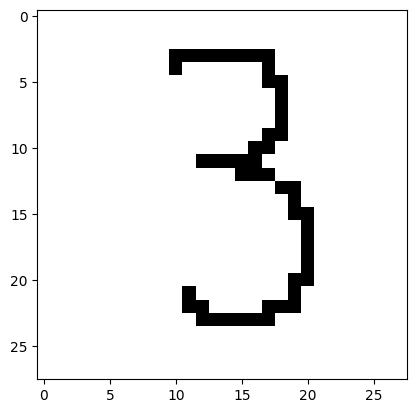

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This number is probably a 4


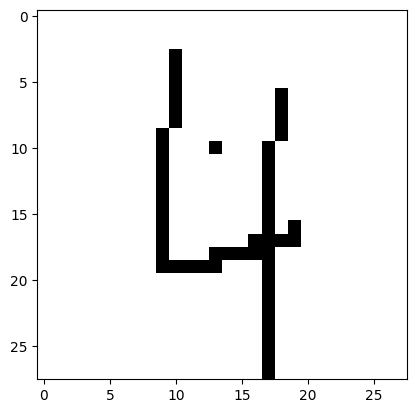

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This number is probably a 2


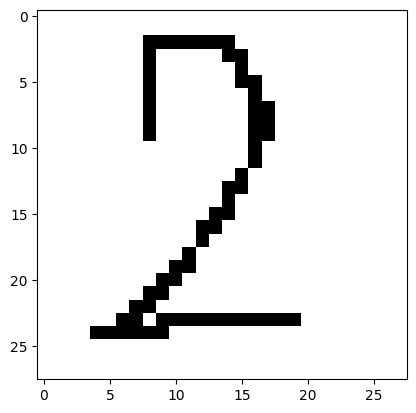

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
This number is probably a 0


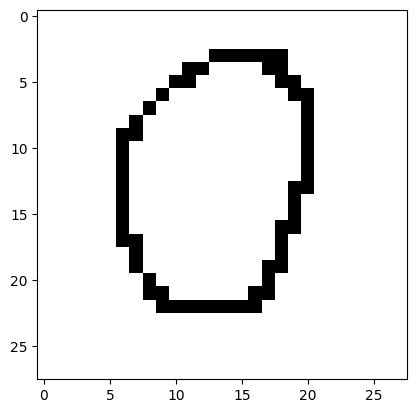

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
This number is probably a 3


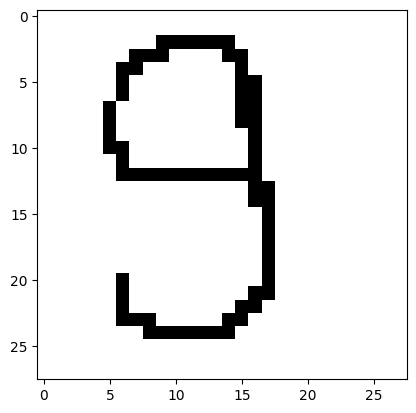

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
This number is probably a 3


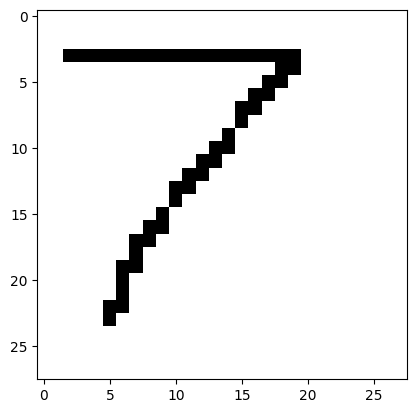

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
This number is probably a 5


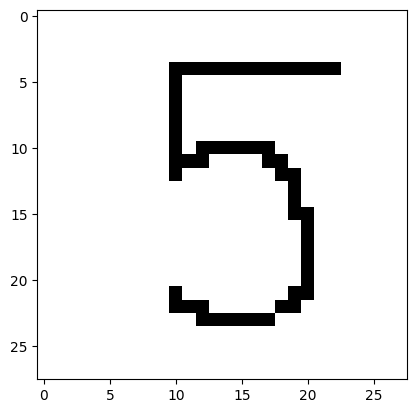

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
This number is probably a 6


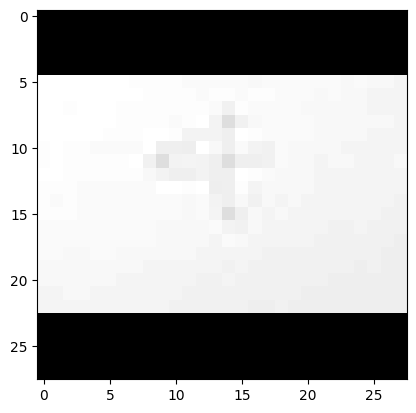

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
This number is probably a 0


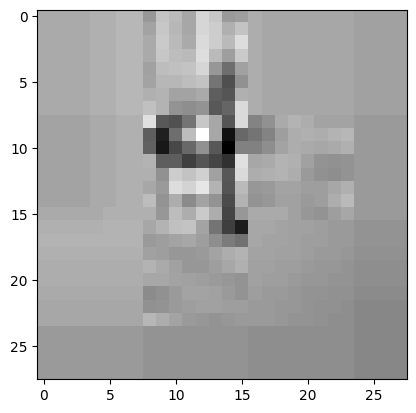

In [64]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This number is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(f"Error with file digits/digit{image_number}.png: {e}")
    finally:
        image_number += 1